In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
x_train, x_test, y_train, y_test = train_test_split()

<Axes: xlabel='PTRATIO', ylabel='LSTAT'>

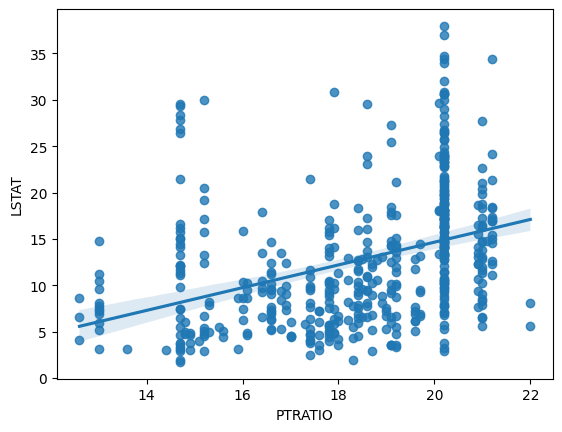

In [13]:
sns.regplot(x='PTRATIO', y='LSTAT', data=df)

In [18]:
df.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [20]:
x=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [21]:
y=df['MEDV']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=24  )

In [ ]:
lr=LinearRegression()

In [46]:
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
print(x_train.isnull().sum())  # Shows count of NaNs per column

CRIM       17
ZN         17
INDUS      18
CHAS       15
NOX         0
RM          0
AGE        16
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      15
dtype: int64


In [42]:
x_train=x_train.fillna(x_train.mean())
x_test=x_test.fillna(x_train.mean())

In [49]:
lr.score(x_test,y_test)

0.6439090507825008

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
y_pred=lr.predict(x_test)
y_pred

array([21.39406792, 18.87996997, 26.5031455 , 21.10373592, 21.34472996,
       34.95580113, 22.74724567, 15.70313565, 10.24124306, 29.49815818,
       23.27330218, 18.43015236, 15.95881214, 27.1115539 , 22.4377546 ,
       23.0690258 , 29.01718993, 31.59778724, 32.49435382, 25.74241489,
       17.36358721, 26.10453549, 10.96575185, 23.28825068, 20.8901398 ,
       22.60503864, 30.42816533, 30.30346013, 16.53683638, 23.20779978,
       27.68544081, 25.13599425, 27.7717493 , 18.24803309,  9.30037095,
       26.85025187, 11.31618424, 19.88685285, 38.88294379, 22.56579691,
       22.00714158, 31.22230341, 20.52856366, 17.55236507, 32.31389931,
        8.43250594, 18.71506149, 22.88996544, 23.33248314, 21.76084057,
       25.54755189, 31.4637312 , 41.887892  , 16.78332658, 26.74413056,
       28.46883331, 21.73468504, 19.47798842, 25.24856208, 13.09714709,
       17.3131711 , 16.06117839, 22.54781104, 13.75436961, 23.53988729,
        9.81001761, 25.5125654 , 18.20762811, 17.12830825,  5.93

In [55]:
mean_absolute_error(y_test, y_pred)

3.3070370998688348

In [56]:
mean_squared_error(y_test, y_pred)

24.1198663085568

In [57]:
r2_score(y_test, y_pred)

0.6439090507825008

In [58]:
lr.coef_

array([-7.45174658e-02,  3.78179654e-02, -7.32751513e-02,  3.51009679e+00,
       -1.41945292e+01,  4.55633690e+00, -1.09617942e-02, -1.41822671e+00,
        2.22827943e-01, -9.99782509e-03, -8.27997635e-01,  1.03403201e-02,
       -4.49890313e-01])

In [59]:
lr.intercept_

27.65244910746279